In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
from IPython.display import IFrame
from wordcloud import WordCloud
import geopandas as gpd

# Analysis of US Political Violence from 2020 to 2024



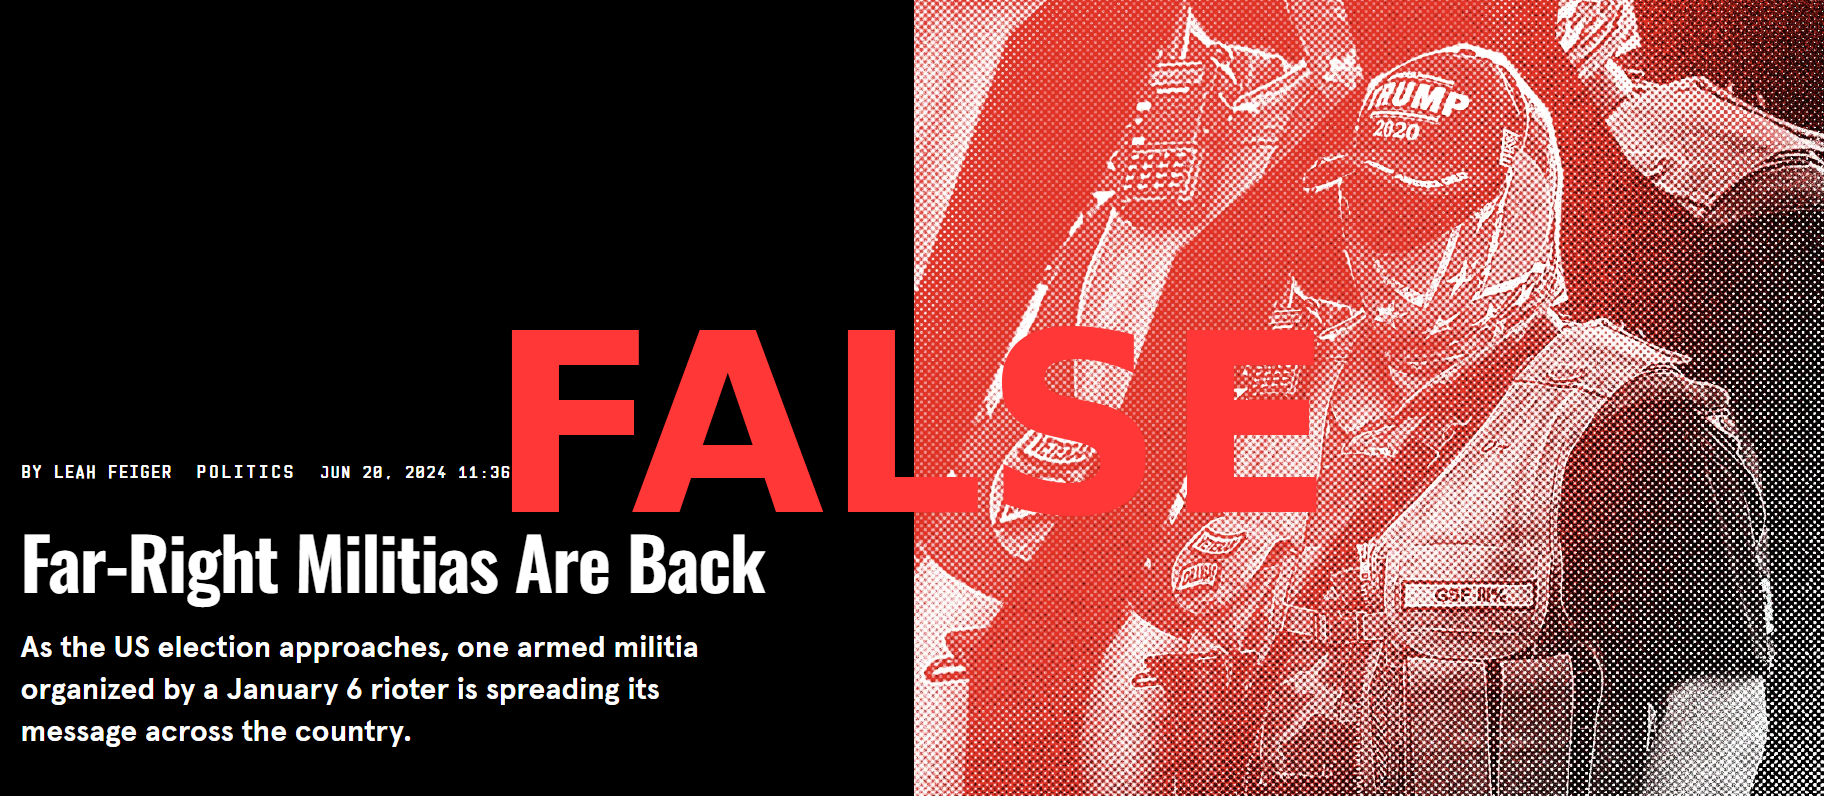

In [3]:
image_path = 'image_with_larger_false_overlay.png'
display(Image(filename=image_path))

In the 2024 news cycle, prominent outlets such as Wired, The New York Times, and other major media sources have contributed to a narrative emphasizing the resurgence and imminent threat of political violence from militias. These reports often highlighted far-right groups and speculated on their capacity to mobilize during a politically volatile period leading up to the U.S. elections. This narrative has promoted a climate of fear, raising concerns about widespread unrest and militia-driven violence.

However, by leveraging open-source intelligence (OSINT) and analyzing publicly available datasets, we aim to critically evaluate these claims. Through a data-driven approach, this analysis seeks to determine the actual levels of militia activity during 2024. Our findings suggest that despite the media's portrayal, political militias have been relatively inactive and did not exhibit significant mobilization in 2024. This notebook examines the data, providing insights that counter the prevailing media narrative and offering a more nuanced understanding of the landscape of political violence in the United States.

# ACLED | Armed Conflict Location & Event Data

An independent, impartial, international non-profit organization collecting data on violent conflict and protest in all countries and territories in the world.

Armed Conflict Location & Event Data (ACLED) is a disaggregated data collection, analysis, and crisis mapping initiative. ACLED collects information on the dates, actors, locations, fatalities, and types of all reported political violence and protest events around the world. The ACLED team conducts analysis to describe and explore conflict trends.

In [4]:
# Load the data
data_path = '2016-01-01-2024-11-19-North_America-United_States (1).csv'
data = pd.read_csv(data_path)
data.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,USA74365,06 November 2024,2024,1,Political violence,Riots,Mob violence,Rioters (United States),NaN,Rioters,...,Chicago - North Side,41.9390,-87.6684,1,ABC7 Chicago,Subnational,"On 6 November 2024, two unidentified men in sk...",0,crowd size=2,1731510574
1,USA74382,05 November 2024,2024,1,Political violence,Riots,Mob violence,Rioters (United States),NaN,Rioters,...,Edmonds,47.8106,-122.3773,1,KIRO Radio,Subnational,"On 5 November 2024, police arrested a woman on...",0,crowd size=one,1731510574
2,USA74465,03 November 2024,2024,1,Political violence,Riots,Mob violence,Rioters (United States),NaN,Rioters,...,Orland Park,41.6303,-87.8525,1,ABC News; Chicago Tribune,Subnational-National,"On 3 November 2024, an individual yelled 'prof...",0,crowd size=1,1731510575
3,USA74620,03 November 2024,2024,1,Political violence,Riots,Mob violence,Rioters (United States),Police Forces of the United States (2021-),Rioters,...,Brookhaven,40.8441,-73.0163,1,ABC7 (New York); CBS News; New York Daily News...,Subnational-National,"On 3 November 2024, an off duty police officer...",0,crowd size=1,1732047043
4,USA74513,02 November 2024,2024,1,Demonstrations,Riots,Violent demonstration,Rioters (United States),NaN,Rioters,...,Stuart,27.1976,-80.2528,1,Miami Herald,Subnational,"On 2 November 2024, a group of about 300 peopl...",0,counter-demonstration; crowd size=about 300,1731510575


# Data Exploration

In [5]:
# see how many rows and columns are in this dataset
shape_info = data.shape 
print('This dataset contains {} rows  and {} columns' 
      .format(shape_info[0], 
              shape_info[1]))

This dataset contains 1467 rows  and 31 columns


In [6]:
# see list of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       1467 non-null   object 
 1   event_date          1467 non-null   object 
 2   year                1467 non-null   int64  
 3   time_precision      1467 non-null   int64  
 4   disorder_type       1467 non-null   object 
 5   event_type          1467 non-null   object 
 6   sub_event_type      1467 non-null   object 
 7   actor1              1467 non-null   object 
 8   assoc_actor_1       1033 non-null   object 
 9   inter1              1467 non-null   object 
 10  actor2              1303 non-null   object 
 11  assoc_actor_2       558 non-null    object 
 12  inter2              1303 non-null   object 
 13  interaction         1467 non-null   object 
 14  civilian_targeting  274 non-null    object 
 15  iso                 1467 non-null   int64  
 16  region

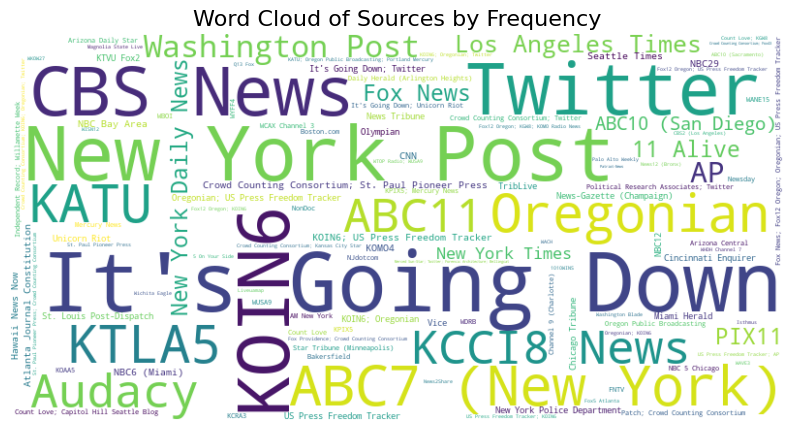

In [7]:
source_counts = data['source'].value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(source_counts)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Sources by Frequency', fontsize=16)
plt.show()

The dataset incorporates a diverse range of sources spanning local, subnational, and national news outlets, reflecting the broad spectrum of media reporting on political violence and militia activity. These sources vary widely in credibility, with some being well-established national outlets and others emerging from grassroots or niche perspectives. For example, the dataset includes prominent right-leaning outlets like Fox News alongside leftist platforms such as It’s Going Down.

## Political Violence Trends Over Time

Political violence in the United States, defined as acts of physical harm between individuals or groups reported by news sources, experienced a significant surge in 2020, notably during the George Floyd protests and the January 6, 2021, Capitol attack. Subsequent years have seen a steady decline in such incidents, attributed to increased law enforcement vigilance and the absence of national figures inciting violence.

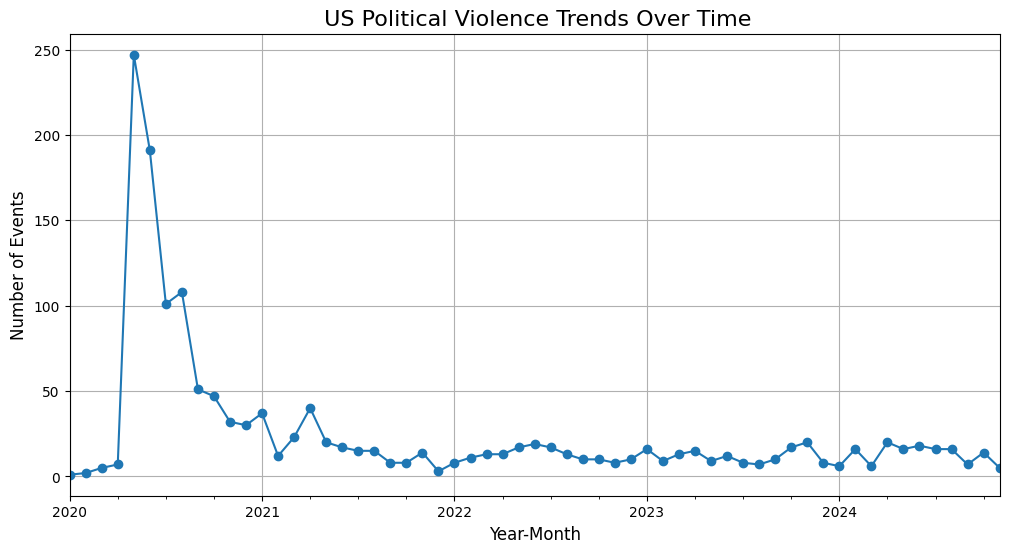

In [21]:
# Convert 'event_date' to datetime for time-series analysis
data['event_date'] = pd.to_datetime(data['event_date'])

# Group events by year and month
data['year_month'] = data['event_date'].dt.to_period('M')
event_trends = data.groupby('year_month').size()

# Plot event trends
plt.figure(figsize=(12, 6))
event_trends.plot(kind='line', marker='o')
plt.title(' US Political Violence Trends Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.grid(True)
plt.show()

## The Proud Boys

The Proud Boys, a far-right extremist group known for its violent rhetoric and actions, played a central role in the January 6, 2021, insurrection at the U.S. Capitol, where they sought to disrupt the certification of the presidential election results. Several key leaders and members have since been convicted and sentenced to lengthy prison terms, significantly weakening the organization’s operational capacity and influence. Following these legal consequences, their public activities and mobilizations have markedly decreased, suggesting a decline in their ability to organize large-scale events or incite widespread unrest. This reduction highlights the impact of judicial accountability on curbing extremist behavior.

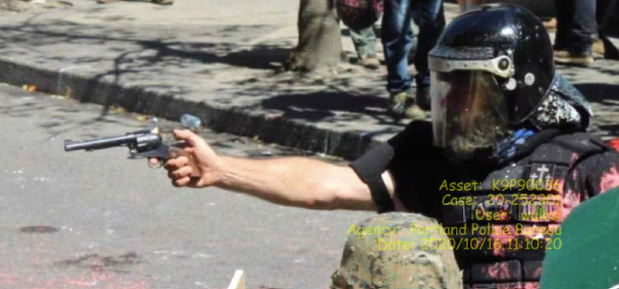

In [22]:
image_path = 'Screenshot 2024-11-26 142716.png'  
display(Image(filename=image_path))

C:\Users\dhmph\AppData\Local\Temp\ipykernel_23344\3208848867.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proud_boys_data['year'] = pd.to_datetime(proud_boys_data['event_date']).dt.year


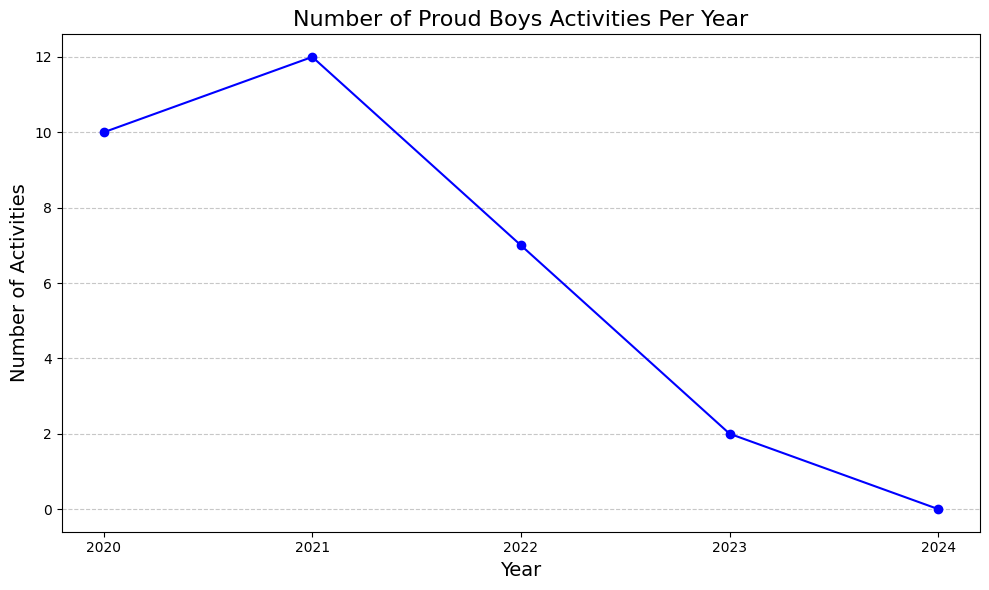

In [18]:
# Filter rows where 'Proud Boys' is in 'assoc_actor_1' or 'assoc_actor_2'
proud_boys_data = data[
    (data['assoc_actor_1'] == 'Proud Boys') | (data['assoc_actor_2'] == 'Proud Boys')
]

# Extract year from 'event_date' and count occurrences per year
proud_boys_data['year'] = pd.to_datetime(proud_boys_data['event_date']).dt.year
proud_boys_yearly_counts = proud_boys_data.groupby('year').size()

# Ensure all years from the minimum year in the dataset to 2024 are included
all_years = pd.Series(range(proud_boys_yearly_counts.index.min(), 2025), name='year')
proud_boys_yearly_counts = proud_boys_yearly_counts.reindex(all_years, fill_value=0)

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(proud_boys_yearly_counts.index, proud_boys_yearly_counts.values, marker='o', color='blue')
plt.title("Number of Proud Boys Activities Per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Activities", fontsize=14)
plt.xticks(range(proud_boys_yearly_counts.index.min(), 2025), rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()